### Import Libraries & Load Data :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv("Books.csv", low_memory=False)
#To ensure no mixed types either set ``False``, or specify the type with the ``dtype`` parameter.
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

### Data Understanding :

In [3]:
books.info()
users.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)

### Data Cleaning & Preprocessing :

##### Books Dataset :

In [4]:
# converting of datatype to numeric
books['Year-Of-Publication'] = pd.to_numeric(
    books['Year-Of-Publication'], errors='coerce'
)

In [5]:
# filling of null values with median
books['Year-Of-Publication'].fillna(
    books['Year-Of-Publication'].median(), inplace=True
)

C:\Users\bhara\AppData\Local\Temp\ipykernel_20892\2015214644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Year-Of-Publication'].fillna(


In [6]:
# filling nul values as unknown
books['Book-Author'].fillna("Unknown", inplace=True)
books['Publisher'].fillna("Unknown", inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_20892\86625006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna("Unknown", inplace=True)
C:\Users\bhara\AppData\Local\Temp\ipykernel_20892\86625006.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

##### Users Dataset :

In [7]:
users['Age'] = users['Age'].fillna(users['Age'].median())# filling null values in age column as median
users = users[(users['Age'] >= 5) & (users['Age'] <= 90)]# taking of users between the range 5 and 90

##### Ratings Dataset :

In [8]:
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [9]:
# Separateing of  explicit ratings
ratings_explicit = ratings[ratings['Book-Rating'] > 0]# these are ratings which ccan be considerd
# ratings which is 0 are not usefull for consideration

In [10]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


### Exploratory Data Analysis (EDA) :

##### Ratings Distribution :

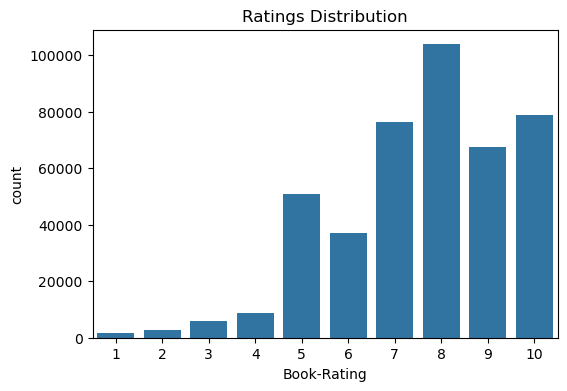

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Book-Rating', data=ratings_explicit)
plt.title("Ratings Distribution")
plt.show()

##### Most Active Users :

In [12]:
ratings_explicit['User-ID'].value_counts().head(10)

User-ID
11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
76499     1036
171118    1035
235105    1023
16795      968
248718     948
Name: count, dtype: int64

##### Most Rated Books :

In [13]:
ratings_explicit['ISBN'].value_counts().head(10)

ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
Name: count, dtype: int64

### Different types of recomendation systems :

#### Popularity-Based Recommendation :

In [14]:
# Useing  only explicit ratings
ratings_explicit = ratings[ratings['Book-Rating'] > 0]

In [15]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


In [16]:
popular = (
    ratings_explicit
    .groupby('ISBN')
    .agg(
        avg_rating=('Book-Rating', 'mean'),
        rating_count=('Book-Rating', 'count')
    )
    .query('rating_count >= 50')
    .sort_values(by=['avg_rating', 'rating_count'], ascending=False)
)

In [17]:
popular

,avg_rating,rating_count
ISBN,,
0345339738,9.402597,77
0439139597,9.262774,137
043936213X,9.207547,53
0345339711,9.120482,83
0439136369,9.082707,133
...,...,...
0446516538,6.420000,50
0451203895,5.653846,52
080213825X,5.444444,54


In [18]:
popular = popular.merge(books, on='ISBN')

In [19]:
popular.head(5)

,ISBN,avg_rating,rating_count,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0345339738,9.402597,77,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...
1,0439139597,9.262774,137,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
2,043936213X,9.207547,53,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...,http://images.amazon.com/images/P/043936213X.0...
3,0345339711,9.120482,83,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
4,0439136369,9.082707,133,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001.0,Scholastic,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...,http://images.amazon.com/images/P/0439136369.0...


In [20]:
popular[['Book-Title', 'Book-Author']].head(10)

,Book-Title,Book-Author
0,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling
3,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN
4,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling
5,Charlotte's Web (Trophy Newbery),E. B. White
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling
7,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling
8,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling
9,The Little Prince,Antoine de Saint-ExupÃ©ry


#### Content-Based :
##### (TF-IDF + KNN)

##### Reduceing Items (Critical) :

In [21]:
popular_isbns = ratings_explicit['ISBN'].value_counts()
popular_isbns = popular_isbns[popular_isbns >= 50].index

In [22]:
popular_isbns

Index(['0316666343', '0971880107', '0385504209', '0312195516', '0679781587',
       '0060928336', '059035342X', '0142001740', '0446672211', '044023722X',
       ...
       '0446516538', '1844262553', '0449912558', '051513628X', '0446675059',
       '0091867770', '0345384369', '044022103X', '0671894455', '0679723161'],
      dtype='object', name='ISBN', length=537)

In [23]:
books_small = books[books['ISBN'].isin(popular_isbns)].reset_index(drop=True)

In [24]:
books_small.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
1,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
2,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
3,0345402871,Airframe,Michael Crichton,1997.0,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...
4,0345417623,Timeline,MICHAEL CRICHTON,2000.0,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...


##### Step 2: Controlled TF-IDF:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

books_small['content'] = (
    books_small['Book-Title'] + " " +
    books_small['Book-Author']
)

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000   # here we are controlling memory 
)

tfidf_matrix = tfidf.fit_transform(books_small['content'])


In [26]:
tfidf_matrix.shape

(531, 1295)

##### Step 3: KNN (NO NxN MATRIX) :

In [27]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(
    metric='cosine',
    algorithm='brute'
)

knn_model.fit(tfidf_matrix)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


##### Step 4: Recommendation Function:

In [28]:
'''def recommend_content(book_title, top_n=5):
    idx = books_small[
        books_small['Book-Title'] == book_title
    ].index[0]

    distances, indices = knn_model.kneighbors(
        tfidf_matrix[idx], n_neighbors=top_n + 1
    )

    return books_small.iloc[indices[0][1:]][
        ['Book-Title', 'Book-Author']
    ]'''

"def recommend_content(book_title, top_n=5):\n    idx = books_small[\n        books_small['Book-Title'] == book_title\n    ].index[0]\n\n    distances, indices = knn_model.kneighbors(\n        tfidf_matrix[idx], n_neighbors=top_n + 1\n    )\n\n    return books_small.iloc[indices[0][1:]][\n        ['Book-Title', 'Book-Author']\n    ]"

In [29]:
def recommend_content(book_title, top_n=5):

    matches = books_small[
        books_small['Book-Title'].str.lower() == book_title.lower()
    ]

    if matches.empty:
        return "❌ Book not found in content-based model (filtered dataset)."

    idx = matches.index[0]

    distances, indices = knn_model.kneighbors(
        tfidf_matrix[idx], n_neighbors=top_n + 1
    )

    return books_small.iloc[indices[0][1:]][
        ['Book-Title', 'Book-Author']
    ]


In [30]:
recommend_content("The Return of the King (The Lord of the Rings, Part 3)")

,Book-Title,Book-Author
102,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN
176,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN
301,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN
189,Lord of the Flies,William Gerald Golding
328,Dreamcatcher,Stephen King


#### Collaborative Filtering :
#### (Item-Based + Sparse + KNN) :

##### Step 1: Filtering Data

In [31]:
active_users = ratings_explicit['User-ID'].value_counts()
popular_books = ratings_explicit['ISBN'].value_counts()

In [32]:
print(f'Active Users \n{active_users}\n')
print(f'Popular Books \n{popular_books}\n')

Active Users 
User-ID
11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
93203        1
93196        1
276774       1
93191        1
276671       1
Name: count, Length: 77805, dtype: int64

Popular Books 
ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
             ... 
8440682697      1
1591856132      1
080242712X      1
3453213025      1
0856356670      1
Name: count, Length: 185973, dtype: int64



In [33]:
ratings_small = ratings_explicit[
    ratings_explicit['User-ID'].isin(active_users[active_users >= 50].index) &
    ratings_explicit['ISBN'].isin(popular_books[popular_books >= 50].index)
]

In [34]:
ratings_explicit.size

1301013

In [35]:
ratings_small.size

42864

In [36]:
ratings_explicit.size-ratings_small.size

1258149

In [37]:
ratings_small

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1474,277427,0061009059,9
1522,277427,0316776963,8
1543,277427,0345413903,10
1578,277427,0385424736,9
...,...,...,...
1149530,276680,0385504209,8
1149551,276680,0440221595,8
1149564,276680,0452283205,7
1149581,276680,0679781587,9


##### *Step 2: Sparse Matrix :

In [38]:
from scipy.sparse import csr_matrix#Compressed Sparse Row matrix.

user_item = ratings_small.pivot_table(
    index='ISBN',
    columns='User-ID',
    values='Book-Rating'
)

sparse_matrix = csr_matrix(user_item.fillna(0))


In [39]:
user_item

User-ID,254,638,643,1025,1211,1424,1733,1903,2033,2110,...,274061,274111,274301,275970,276680,277427,278026,278137,278188,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
0060096195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006016848X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060173289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060175400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573229326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1573229571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1592400876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Step 3: Item-Based KNN :

In [40]:
knn_cf = NearestNeighbors(
    metric='cosine',
    algorithm='brute'
)

knn_cf.fit(sparse_matrix)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


##### Step 4: Recommendation :

In [41]:
def recommend_cf(isbn, top_n=5):
    idx = user_item.index.get_loc(isbn)

    distances, indices = knn_cf.kneighbors(
        sparse_matrix[idx], n_neighbors=top_n + 1
    )

    rec_isbns = user_item.index[indices[0][1:]]
    return books[books['ISBN'].isin(rec_isbns)][
        ['Book-Title', 'Book-Author']
    ]

In [42]:
recommend_cf('0060175400').reset_index()

,index,Book-Title,Book-Author
0,2292,Pigs in Heaven,Barbara Kingsolver
1,3028,Free,Paul Vincent
2,4264,Prodigal Summer,Barbara Kingsolver
3,10094,One True Thing,Anna Quindlen
4,10529,Deja Dead,Kathy Reichs


#### Collaborative Filtering:
#### SVD(Singular Value Decomposition)

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
reduced_matrix = svd.fit_transform(sparse_matrix)

In [44]:
from sklearn.neighbors import NearestNeighbors

svd_knn = NearestNeighbors(
    metric='cosine',
    algorithm='brute'
)

svd_knn.fit(reduced_matrix)


,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [45]:
def recommend_svd(isbn, top_n=5):

    # --- Check ISBN exists ---
    if isbn not in user_item.index:
        return "❌ ISBN not found in SVD model."

    # --- Find index ---
    idx = user_item.index.get_loc(isbn)

    # --- KNN on reduced matrix ---
    distances, indices = svd_knn.kneighbors(
        reduced_matrix[idx].reshape(1, -1),
        n_neighbors=top_n + 1
    )

    rec_isbns = user_item.index[indices[0][1:]]

    return books[books['ISBN'].isin(rec_isbns)][
        ['Book-Title', 'Book-Author']
    ].reset_index(drop=True)


In [46]:
recommend_svd('0060175400')

,Book-Title,Book-Author
0,What to Expect the First Year,Arlene Eisenberg
1,Pigs in Heaven,Barbara Kingsolver
2,Prodigal Summer,Barbara Kingsolver
3,One True Thing,Anna Quindlen
4,Deja Dead,Kathy Reichs


In [51]:
import pickle

pickle.dump(books, open("books.pkl", "wb"))
pickle.dump(user_item.index, open("isbn_index.pkl", "wb"))
pickle.dump(svd, open("svd_model.pkl", "wb"))
pickle.dump(reduced_matrix, open("reduced_matrix.pkl", "wb"))
pickle.dump(svd_knn, open("svd_knn.pkl", "wb"))


In [47]:
'''
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    ratings_explicit,
    test_size=0.2,
    random_state=42
)
'''

##### PRECISION@K (MOST COMMON)
##### for Item-Based CF

In [48]:
'''
def precision_at_k(model_func, test_data, k=5):
    hits = 0
    total = 0

    for user in test_data['User-ID'].unique()[:100]:  # limit for speed
        user_items = test_data[test_data['User-ID'] == user]['ISBN'].values
        if len(user_items) == 0:
            continue

        recs = model_func(user_items[0], top_n=k)
        rec_isbns = recs['ISBN'].values

        hits += len(set(user_items) & set(rec_isbns))
        total += k

    return hits / total
'''

##### RECALL@K

In [49]:
'''
def recall_at_k(model_func, test_data, k=5):
    hits = 0
    total = 0

    for user in test_data['User-ID'].unique()[:100]:
        user_items = test_data[test_data['User-ID'] == user]['ISBN'].values
        if len(user_items) == 0:
            continue

        recs = model_func(user_items[0], top_n=k)
        rec_isbns = recs['ISBN'].values

        hits += len(set(user_items) & set(rec_isbns))
        total += len(user_items)

    return hits / total
'''